## Problem Statement:
- Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## About the data: 
- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.columns=['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df['taxable']= np.where(df['Taxable_Income']<= 30000, "Risky" , "Good")
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,taxable
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [7]:
df['taxable'].unique()

array(['Good', 'Risky'], dtype=object)

In [8]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['taxable']= label_encoder.fit_transform(df['taxable'])

In [9]:
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,taxable
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [10]:
df.isnull().any()

Undergrad          False
Marital_Status     False
Taxable_Income     False
City_Population    False
Work_Experience    False
Urban              False
taxable            False
dtype: bool

In [11]:
df.drop(["Taxable_Income"],axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import minmax_scale

In [13]:
normal_data=pd.DataFrame(minmax_scale(df),columns=df.columns)
normal_data

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable
0,0.0,1.0,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.010081,0.933333,0.0,0.0
...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.886810,0.566667,0.0,0.0


In [14]:
x=normal_data.iloc[:,0:5]
y=normal_data['taxable']

In [15]:
x

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [16]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: taxable, Length: 600, dtype: float64

In [17]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Marital_Status',
 'City_Population',
 'Work_Experience',
 'Urban',
 'taxable']

In [18]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

## Building Decision Tree Classifier using Entropy Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

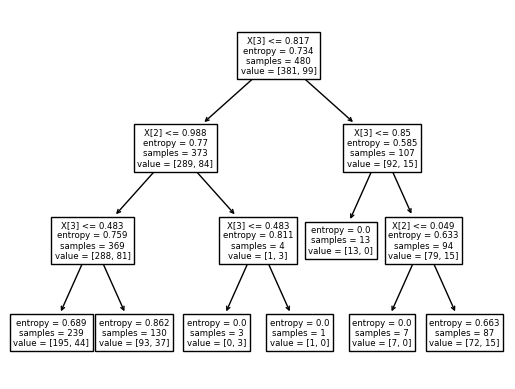

In [20]:
#PLot the decision tree
tree.plot_tree(model);

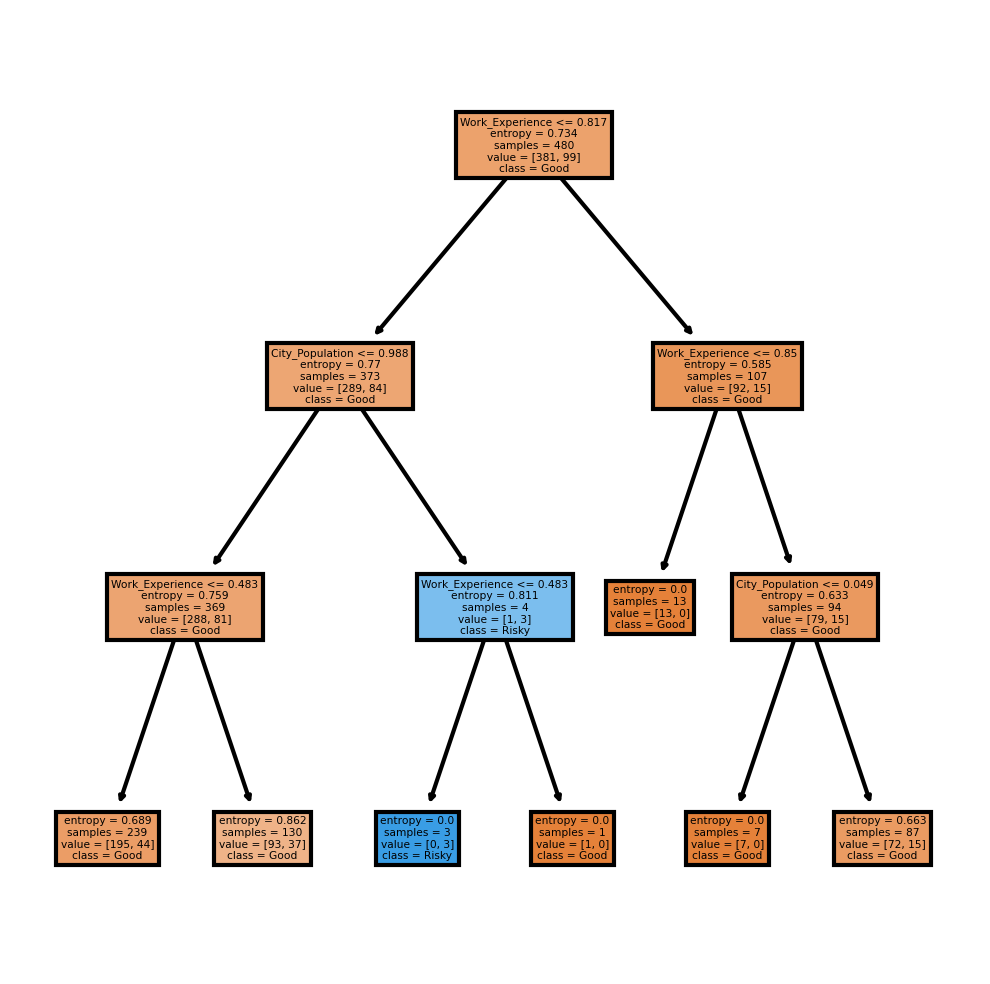

In [21]:
fn=colnames
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [22]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    119
1.0      1
dtype: int64

In [23]:
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [24]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
taxable,,
0.0,94,1
1.0,25,0


In [25]:
# Accuracy 
np.mean(preds==y_test)

0.7833333333333333

## Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7833333333333333

## Decision Tree Regression Example

In [29]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [30]:
array = df.values
X = array[:,0:5]
y = array[:,5]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
#Find the accuracy
model.score(X_test,y_test)

-1.1617088607594939